<a href="https://colab.research.google.com/github/Pager07/TensorflowSpecialization/blob/master/ConvNetMnistAndVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [25]:
import tensorflow as tf

#Simple NN on Mnist

In [26]:
#load data 
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
#normalize the data
x_train , x_test = x_train/255. , x_test/255.

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation=tf.nn.relu), 
                             tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4736 - accuracy: 0.8319
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3565 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3221 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2998 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8958


In [7]:
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8797


#Conv Net on Fashion Mnist

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if logs.get('accuracy') >=0.90:
      print('\n90% Accuracy reached! Terminating Training!')
      self.model.stop_training = True
callback = myCallback()


In [30]:
#Load dataset
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
#normalizing the data
x_train,x_test = x_train/255. , x_test/255. 
#Reshaping the data for conv net 
x_train, x_test = x_train.reshape(60000,28,28,1) , x_test.reshape(10000,28,28,1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)), #out: 26x26x64
                                    tf.keras.layers.MaxPooling2D(2,2), #out: 13x13x64
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), #11x11x64
                                    tf.keras.layers.MaxPooling2D(2,2), #out 5x5x64
                                    tf.keras.layers.Flatten(), #out 1600
                                    tf.keras.layers.Dense(units=128,activation='relu'),
                                    tf.keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [31]:
model.fit(x_train, y_train, epochs=5, callbacks=[callback])


Epoch 1/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.4379 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2923 - accuracy: 0.8912
Epoch 3/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.2481 - accuracy: 0.9086
90% Accuracy reached! Terminating Training!
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2481 - accuracy: 0.9086


In [ ]:
test_loss = model.evaluate(x_test, y_test)

#Conv-net vis

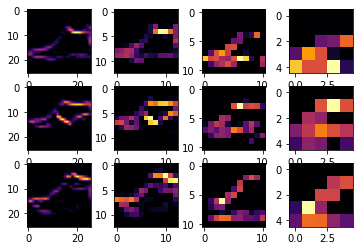

In [41]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
